In [398]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numdifftools as nd

In [399]:
df = pd.read_csv('./../data/price_elasticity_data.csv')

In [400]:
df.isnull().sum()

Product              0
Menu_Price           0
Pizza_Count          0
Profit_Percentage    0
dtype: int64

rename columns

In [401]:
names = {'Menu_Price': 'unit_price', 'Pizza_Count': 'quantity', 'Profit_Percentage': 'profit_percentage'}
df.rename(columns=names, inplace=True)

# calculate additional features

In [402]:
df['gross_margin'] = df['profit_percentage'] / 100
df['gross_profit'] = df['unit_price'] * (1 - df['gross_margin'])
df['cost'] = df['unit_price'] - df['gross_profit']

# Subset the dataframe for 'Communita' product and create a copy

In [403]:
communita_df = df[df['Product'] == 'Communita'].copy()

In [404]:
communita_df.isnull().sum()

Product              0
unit_price           0
quantity             0
profit_percentage    0
gross_margin         0
gross_profit         0
cost                 0
dtype: int64

In [405]:
communita_df['unit_price'].max()

np.float64(25.64)

# Fit linear regression model

In [406]:
# extract x and y values
x_value = communita_df['unit_price']
y_value = communita_df['quantity']

# ensure x and y are of the same length
assert len(x_value) == len(y_value), "x and y must have the same length"

# add a constant to the independent variable (unit_price)
X = add_constant(x_value)

# fit the regression model
model = sm.OLS(y_value, X)
communita_result = model.fit()

# print the summary of the regression model
print(communita_result.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           2.29e-23
Time:                        13:57:17   Log-Likelihood:                 128.89
No. Observations:                  85   AIC:                            -253.8
Df Residuals:                      83   BIC:                            -248.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7463      0.032    118.686      0.0

# Analysis
Here’s a detailed analysis of the OLS regression results:

### Key Outputs:

1. **Dependent Variable**: `quantity`
2. **R-squared**: 0.699
3. **Adjusted R-squared**: 0.696
4. **F-statistic**: 193.0
5. **Prob (F-statistic)**: 2.29e-23
6. **Number of Observations**: 85
7. **AIC**: -253.8
8. **BIC**: -248.9

### Coefficients:

| Variable   | Coefficient | Std. Error | t-value  | P-value | [0.025  | 0.975]   |
|------------|-------------|------------|----------|---------|---------|----------|
| const      | 3.7463      | 0.032      | 118.686  | 0.000   | 3.683   | 3.809    |
| unit_price | -0.0334     | 0.002      | -13.893  | 0.000   | -0.038  | -0.029   |

### Interpretation:

1. **R-squared (0.699)**:
   - This indicates that approximately 69.9% of the variance in the dependent variable (`quantity`) is explained by the independent variable (`unit_price`). This suggests a strong relationship between `unit_price` and `quantity`.

2. **Adjusted R-squared (0.696)**:
   - This is slightly lower than the R-squared value, which is expected as it adjusts for the number of predictors in the model. The high value still indicates a good fit.

3. **F-statistic (193.0)**:
   - The F-statistic tests whether at least one of the predictors is significantly related to the dependent variable. The high value and the very low p-value (2.29e-23) indicate that the model is statistically significant.

4. **Coefficients**:
   - **Constant (3.7463)**: This is the intercept of the regression line. It represents the estimated quantity when the unit price is zero. Since having a unit price of zero is not realistic, this coefficient primarily serves to position the regression line on the graph.
   - **Unit_price (-0.0334)**: This is the slope of the regression line. It indicates that for each unit increase in price, the quantity sold decreases by approximately 0.0334 units, holding all else constant. The negative sign indicates an inverse relationship between price and quantity sold.

5. **Standard Errors**:
   - The standard error of the coefficients indicates the average distance that the observed values fall from the regression line. Both coefficients have very low standard errors, suggesting high precision of the estimates.

6. **t-values and P-values**:
   - The t-values for both coefficients are very high (in absolute terms), and the p-values are very low (0.000), indicating that both coefficients are statistically significant at the 5% significance level.

7. **Confidence Intervals (95%)**:
   - The 95% confidence intervals for the coefficients do not include zero, reinforcing that both the intercept and the slope are statistically significant.

8. **Omnibus Test (8.832)**:
   - The Omnibus test checks for the normality of the residuals. A significant result (Prob > 0.012) suggests that the residuals may not be perfectly normally distributed.

9. **Durbin-Watson Statistic (0.633)**:
   - The Durbin-Watson statistic tests for the presence of autocorrelation in the residuals. Values close to 2 suggest no autocorrelation, while values closer to 0 indicate positive autocorrelation. A value of 0.633 suggests some positive autocorrelation.

10. **Jarque-Bera (JB) Test (8.764)**:
    - The JB test checks for normality of residuals. The significant result (Prob > 0.0125) suggests that the residuals may not be perfectly normally distributed.

11. **Skewness and Kurtosis**:
    - **Skewness (-0.637)**: Indicates a slight left skew in the residuals.
    - **Kurtosis (3.923)**: Indicates that the residuals have heavier tails than a normal distribution.

12. **Condition Number (71.4)**:
    - This tests for multicollinearity. Values above 30 might indicate multicollinearity problems. A value of 71.4 suggests some potential issues, but since there is only one predictor, it might not be a significant concern.

### Conclusion:
- The regression model shows a strong, statistically significant inverse relationship between `unit_price` and `quantity`.
- The model fits the data well, as indicated by the high R-squared and adjusted R-squared values.
- There might be some issues with autocorrelation and normality of residuals, as indicated by the Durbin-Watson and Omnibus/JB tests.

This analysis suggests that as the price increases, the quantity sold decreases. The model is robust but might benefit from further diagnostic tests and potentially including more predictors to improve the fit and address any issues with residuals.

# Get the predicted values

In [407]:
predictions = communita_result.predict(X)

Add predictions to the dataframe

In [408]:
communita_df['predictions'] = predictions

Create a scatter plot with the regression line

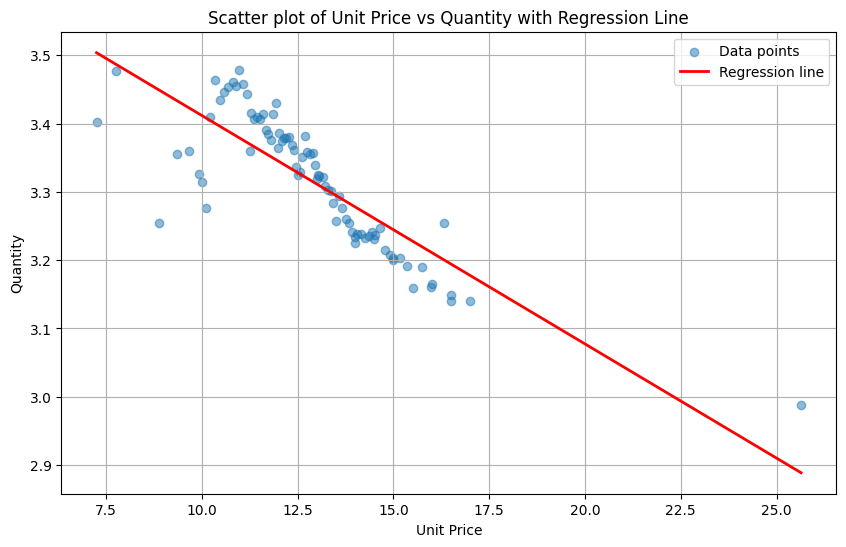

In [409]:
plt.figure(figsize=(10, 6))
plt.scatter(
    communita_df['unit_price'], 
    communita_df['quantity'], 
    alpha=0.5, 
    label='Data points'
)
plt.plot(
    communita_df['unit_price'], 
    predictions, 
    color='red', 
    linewidth=2, 
    label='Regression line'
)
plt.title('Scatter plot of Unit Price vs Quantity with Regression Line')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

The regression line represents the relationship between unit rice and quantity demanded as modelled by simple linear regression. We can use it to derive our Price elasticity of demand (PED)

The regression line can be expressed as:
$$\text{Quantity} = \alpha + \beta \times \text{Price}$$

where:
- $\alpha$ is the intercept of the line.
- $\beta$ is the slope of the regression line

From our regression summary we know that:
- $\alpha = 6.6425$
- $\beta = -0.1639$

In [410]:
mean_cost = np.mean(communita_df['cost'])

# Access alpha and beta directly from the fitted model

In [411]:
alpha = communita_result.params['const']
alpha

np.float64(3.74627243043634)

In [412]:
beta = communita_result.params['unit_price']
beta

np.float64(-0.03344390616420833)

# Calculate mean price and mean quantity

In [413]:
communita_mean_price = np.mean(communita_df['unit_price'])
communita_mean_quantity = np.mean(communita_df['quantity'])

# Calculate PED

In [414]:
ped = beta * (communita_mean_price / communita_mean_quantity)
print(f'Price Elasticity of Demand: {ped}')

Price Elasticity of Demand: -0.1299981896117636


Communita is less elastic and individuale

# plot profit curve
we want to know at what price point we maximise gross profit

In [415]:
# Calculate the gross profit based on the predictions
communita_df['gross_profit_predictions'] = (communita_df['unit_price'] - communita_df['cost']) * communita_df['predictions']

# Find the price that maximizes gross profit

In [416]:
optimal_price = communita_df.loc[communita_df['gross_profit_predictions'].idxmax(), 'unit_price']
max_gross_profit = communita_df['gross_profit_predictions'].max()
optimal_quantity = communita_df.loc[communita_df['gross_profit_predictions'].idxmax(), 'predictions']

In [417]:
def gross_profit_function(price):
    """
    Define the gross profit function based on the regression model
    :param price: 
    :return: 
    """
    return (price - mean_cost) * (alpha + beta * price)

Calculate the first derivative (slope) at the optimal price

In [ ]:
derivative_function = nd.Derivative(gross_profit_function)
slope_at_optimal_price = derivative_function(optimal_price)

first derivative line, given point and slope

In [418]:
x1, y1 = 25.64, 36.47
slope = 2.220280931482931
intercept = y1 - slope * x1  # calculate y-intercept
x_vals = np.linspace(communita_df['unit_price'].min(), communita_df['unit_price'].max(), 100)  # generate x values for the line
y_vals = slope * x_vals + intercept  # calculate y values using the line equation

# Plot the original gross profit curve

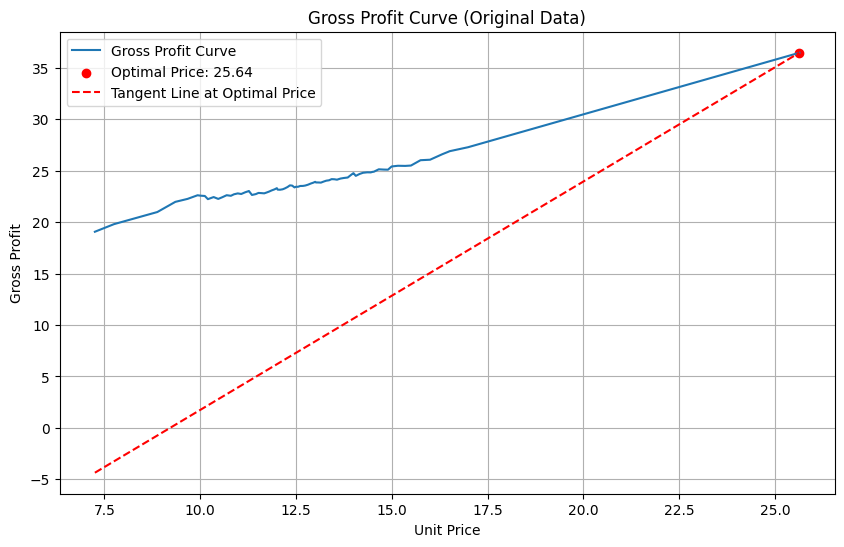

In [419]:
plt.figure(figsize=(10, 6))
plt.plot(
    communita_df['unit_price'], 
    communita_df['gross_profit_predictions'], 
    label='Gross Profit Curve'
)
plt.scatter(
    optimal_price, 
    max_gross_profit, 
    color='red', 
    label=f'Optimal Price: {optimal_price:.2f}'
)
plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    linestyle='--', 
    label=f'Tangent Line at Optimal Price'
)
plt.title('Gross Profit Curve (Original Data)')
plt.xlabel('Unit Price')
plt.ylabel('Gross Profit')
plt.legend()
plt.grid(True)
plt.show()

Print the optimal price and slope at that point

In [420]:
print(f'Optimal Price (Original): {round(optimal_price, 2)}')
print(f'Optimal Quantity (Original): {round(optimal_quantity, 0)}')
print(f'Maximum Gross Profit: {round(max_gross_profit, 2)}')
print(f'Slope of the Gross Profit Function at Optimal Price: {slope_at_optimal_price}')

Optimal Price (Original): 25.64
Optimal Quantity (Original): 3.0
Maximum Gross Profit: 36.47
Slope of the Gross Profit Function at Optimal Price: 2.220280931482931


# Observations


# Extend the predictions
Create a new range of unit prices extending beyond the observed data

In [421]:
new_unit_prices = np.linspace(communita_df['unit_price'].min(), 100, 100)
new_X = sm.add_constant(new_unit_prices)

Predict the quantities for the new range of unit prices

In [422]:
new_predictions = communita_result.predict(new_X)

Calculate the gross profit for the new unit prices. Assuming cost remains constant, using the mean cost from the original data

In [423]:
new_gross_profits = (new_unit_prices - mean_cost) * new_predictions

Find the price that maximizes gross profit

In [424]:
max_index = np.argmax(new_gross_profits)
optimal_price_extended = new_unit_prices[np.argmax(new_gross_profits)]
max_gross_profit_extended = new_gross_profits.max()
optimal_quantity_extended = new_predictions[max_index]

In [425]:
def extended_gross_profit_function(price):
    """
    Define the gross profit function based on the regression model
    :param price: 
    :return: 
    """
    return (price - mean_cost) * (alpha + beta * price)

Calculate the first derivative (slope) at the optimal price

In [ ]:
derivative_function = nd.Derivative(extended_gross_profit_function)
slope_at_optimal_price_extended = derivative_function(optimal_price_extended)

# Plot the extended gross profit curve

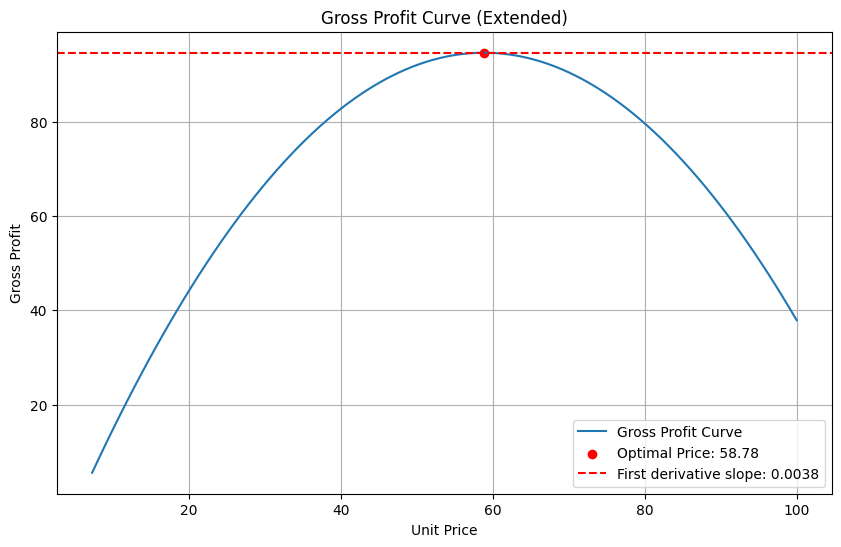

In [426]:
plt.figure(figsize=(10, 6))
plt.plot(
    new_unit_prices, 
    new_gross_profits, 
    label='Gross Profit Curve'
)
plt.scatter(
    optimal_price_extended, 
    max_gross_profit_extended, 
    color='red', 
    label=f'Optimal Price: {optimal_price_extended:.2f}'
)
plt.axhline(
    y=max_gross_profit_extended, 
    color='red', 
    linestyle='--', 
    label=f'First derivative slope: {slope_at_optimal_price_extended:.4f}'
)
plt.title('Gross Profit Curve (Extended)')
plt.xlabel('Unit Price')
plt.ylabel('Gross Profit')
plt.legend()
plt.grid(True)
plt.savefig('./../plots/communita_ext_gp_curve')
plt.show()

# Print the optimal price and maximum gross profit

In [427]:
print(f'Optimal Price (Extended): {round(optimal_price_extended, 2)}')
print(f'Optimal Quantity (Extended): {round(optimal_quantity_extended, 2)}')
print(f'Maximum Gross Profit (Extended): {max_gross_profit_extended}')
print(f'Slope of the Gross Profit Function at Optimal Price (Extended): {slope_at_optimal_price_extended}')

Optimal Price (Extended): 58.78
Optimal Quantity (Extended): 1.78
Maximum Gross Profit (Extended): 94.59187758231018
Slope of the Gross Profit Function at Optimal Price (Extended): 0.003767470502154223


# Analysis
So, on the face of it, the optimal price point is 58.78 which is confirmed by the slope of the first derivative, which is very close to 0. 

However, because we're making predictions outside the dataset, it can only be considered a hypothesis at this point. We have no data to substantiate it. We should set up an experiment to gather more data about sales quantities at higher price points.

- Hypothesis ($H_1$): The optimal unit price that maximises gross profit is 58.78
- Null Hypothesis ($H_0$): The optimal unit price that maximises gross profit is different from 58.78

In [428]:
# todo: use plotly for the graphs we we can see price and quantity at different points using hover text